## Business Case:- Prediction of Patient with liver Disease (Classification Task)

## Understanding the Problem Statement in this Business Case

The liver is an organ that lies just under the rib cage on the right side of the abdomen.Chronic liver disease (CLD) is a progressive deterioration of liver functions, which includes synthesis of clotting factors, other proteins, detoxification of harmful products of metabolism, and excretion of bile. Untreated liver disease may progress to liver failure, a life-threatening condition.
- Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.
- This data set contains 416 liver patient records and 167 non liver patient records
- collected from North East of Andhra Pradesh, India.
- The &quot;Target&quot; column is a class label used to divide groups into liver patients (liver disease) or not (no disease). - This data set contains 441 male patient records and 142 female patient records.










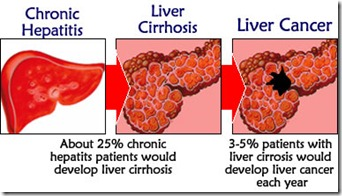











## Market Research:-

- Chronic Liver Disease(CLD) is gradually becoming a public health priority in India. Overall, NAFLD(Non-Alcoholic Fatty Liver Disease) and ALD(Adrenoleukodystrophy) are emerging as important causes of Chronic Liver Disease in the country paralleling the changes in lifestyle and social customs.
- Around 10 lakh patients of liver cirrhosis are newly diagnosed every year in India. Liver disease is the tenth most common cause of death in India as per the World Health Organization. Liver disease affect every one in five Indians. Liver disease kills more people than diabetes and road deaths. Liver diseases does not usually cause any obvious signs or symptoms until it's fairly advanced and the liver is damaged. A number of liver function test are available to test the proper function of the liver.
- Just as in adults, there is a paradigm shift in the etiology of liver diseases in children with metabolic liver diseases, including obesity‐related fatty liver disease.The burden of liver disease in India is difficult to assess since the epidemiological data are not robust as in most parts of the world.The available data, however, show that cirrhosis and its complications as a cause of mortality are increasing in India.Liver disease epidemiology in India is in a transition. Better screening strategies, more effective linkage to care for early‐stage liver disease, and improved awareness on preventive steps in an integrated way could be useful interventions.

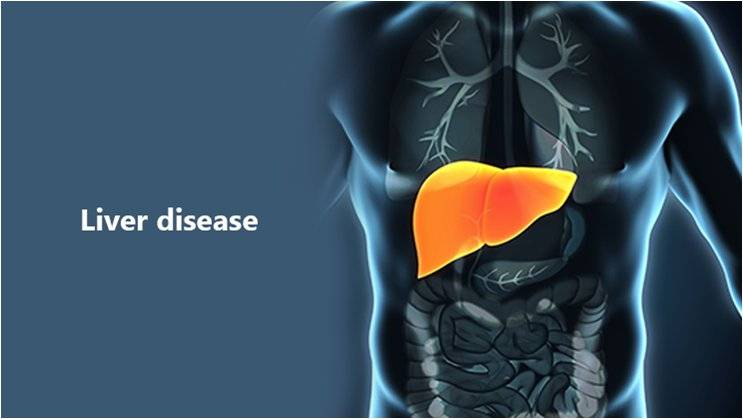

In [25]:
#importing libraries 
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score


In [26]:
#read the data
data=pd.read_csv("Indian Liver Patient Dataset (ILPD).csv",header=None)

In [27]:
#force typecasting 
data.columns=data.columns.astype(str)

In [28]:
data.rename(columns={"0":"Age_of_the_patient",
            "1":"Gender_of_the_patient",
            "2":"Total_Bilirubin",
            "3":"Direct_Bilirubin",
            "4":"Alkaline_Phosphotase",
            "5":"Alanine_Aminotransferase",
            "6":"Aspartate_Aminotransferase",
            "7":"Total_Protiens",
            "8":"Albumin",
            "9":"Albumin_and_Globulin_Ratio",
            "10":"Target"},inplace=True)

## Domain Analysis:-

- **Age of the patient**- It represents the Ages of Patients.
- **Gender of the patient**- It Represents sex of Patients.
- **Total Bilirubin**- It represents both (direct and indirect) bilirubin in blood. (normal range: 0.2 to 0.8 mg/dl)
- **Direct Bilirubin**- Direct Bilirubin is covalently modified bilirubin that has increased solubility. (normal range: 0 to 0.2 mg/dl)
- **Alkaline Phosphatase**- It is an enzyme found in all the tissue in the human body.(normal range: 0.2 to 0.8 mg/dl)
- **Alanine Aminotransferase**- It measures the  level of enzymes ALT in blood. (normal range: 7 to 55 IU/L)
- **Aspartate Aminotransferase**- It measures the the level of enzymes AST in the blood. (normal range: 7 to 55 U/L)
- **Total Proteins**- It represents the total proteins including (Albumin and Globulin). (normal range: 6.0 to 8.3 g/dl , 60 to 83 g/l)
- **Albumin**- It is a protein and is produced in the liver. (normal range: 3.4 to 5.4 g/dl, 34 to 54 g/l)
- **Albumin and Globulin Ratio**- It measures the relative ratio of albumin to globulin.(normal ratio is 1 to 2)
- **Target**- 1 in Target feature represents patient has liver disease and 2 represents patient has no liver disease.


# Basic checks:-

In [29]:
data.head()

,Age_of_the_patient,Gender_of_the_patient,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [30]:
data.tail()

,Age_of_the_patient,Gender_of_the_patient,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age_of_the_patient          583 non-null    int64  
 1   Gender_of_the_patient       583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alanine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


## Missing values:-

In [32]:
data.isnull().sum()

Age_of_the_patient            0
Gender_of_the_patient         0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alanine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64

In [33]:
data.describe()

,Age_of_the_patient,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [34]:
data.describe(include='O')

,Gender_of_the_patient
count,583
unique,2
top,Male
freq,441


- **There are 4 missing values in Albumin_and_Globulin_Ratio.**

## checking for duplicates:-

In [35]:
print(data.loc[data.duplicated()].shape) 
data.loc[data.duplicated()].head(13)

(13, 11)


,Age_of_the_patient,Gender_of_the_patient,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
106,36,Male,5.3,2.3,145,32,92,5.1,2.6,1.00,2
108,36,Male,0.8,0.2,158,29,39,6.0,2.2,0.50,2
138,18,Male,0.8,0.2,282,72,140,5.5,2.5,0.80,1
143,30,Male,1.6,0.4,332,84,139,5.6,2.7,0.90,1
158,72,Male,0.7,0.1,196,20,35,5.8,2.0,0.50,1


- **There are 13 duplicate columns**

# Exploratory Data Analysis (EDA)

In [36]:
data.head()

,Age_of_the_patient,Gender_of_the_patient,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# Univariate Analysis:- 
Univariate analysis is the simplest form of analyzing data. “Uni” means “one” and that means it is used when the data has only one kind of variable.

# Histogram :- 
The histogram is a popular graphing tool. It is used to summarize discrete or continuous data that are measured on an interval scale.

In [37]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=[10,10]## length and width
sns.set_style('darkgrid')  # for grid 

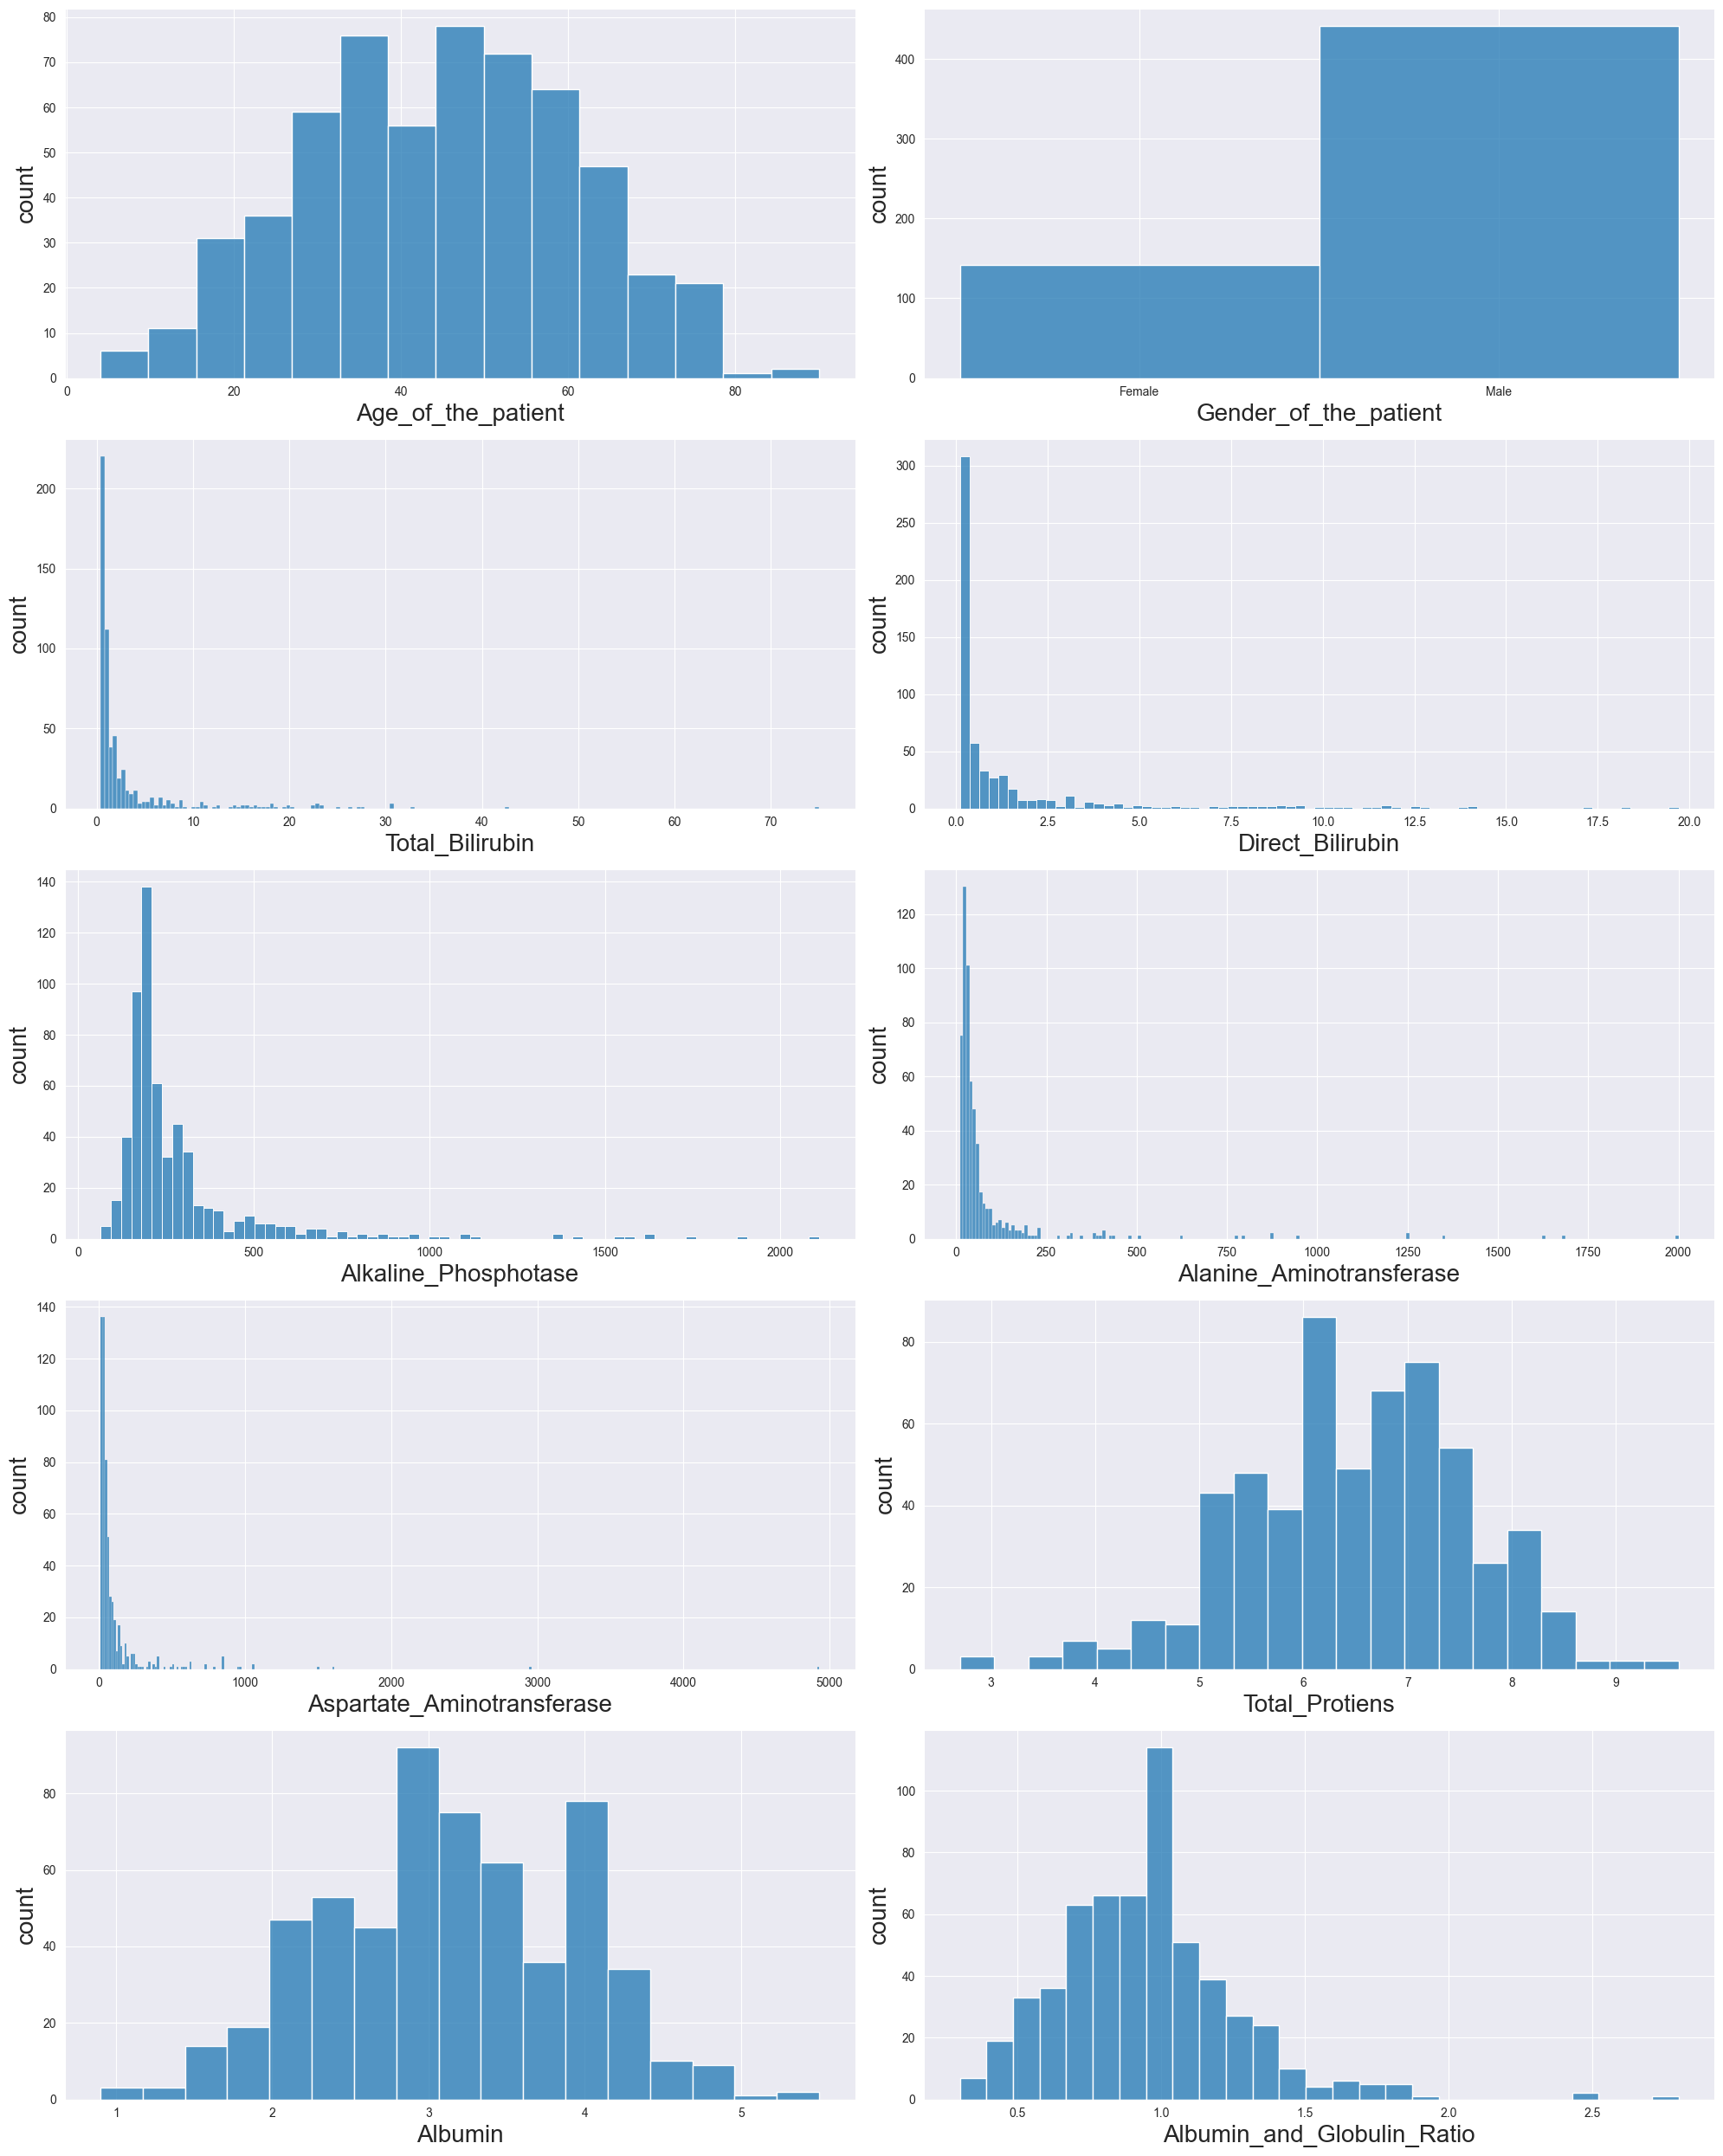

In [38]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Observations:-
* The age of the patient with maximum count is 40-60 years
* The age of the patient with minimum count is above 80 years
* The female records are higher than the male records.
* The count of total bilirubin is between 0-10 
* The count of direct bilirubin is between 0.0-2.5
* The maximum value for Alkaline phosphatase lies between 0-500
* The maximum value for Alanine Amino transferase lies between 0-255
* The maximum value for Aspartate Amino transferase lies between 0-200
* The maximum value for Total protein is 6-7
* The maximum value for Albumin is between 3-4
* The maximum value Albumin and globulin ranges between 0.5 and 1.

# Pie Chart:-

* A Pie Chart is a visualization of univariate data that depicts the data in a circular diagram


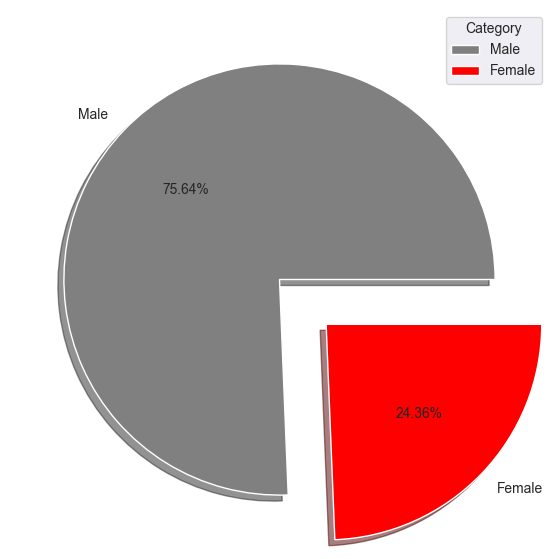

In [39]:
plt.figure(figsize=(7,7))
labels=['Male','Female']
size=data['Gender_of_the_patient'].value_counts()
colors=['grey','red']
explode=[0,0.3]
plt.pie(size,labels=labels,colors=colors,explode=explode,autopct='%.2f%%',shadow=True)
plt.legend(labels,loc=0,title='Category')
plt.show()

### Observation:-
* <centre><h5> 75.64% are males and 24.36% are female </h5></centre>

# Bivariant:- 
Bivariate analysis is stated to be an analysis of any concurrent relation between two variables or attributes.

## Barplot:-

* A bar plot or bar chart is a graph that represents the category of data with rectangular bars with lengths and heights that is proportional to the values which they represents.



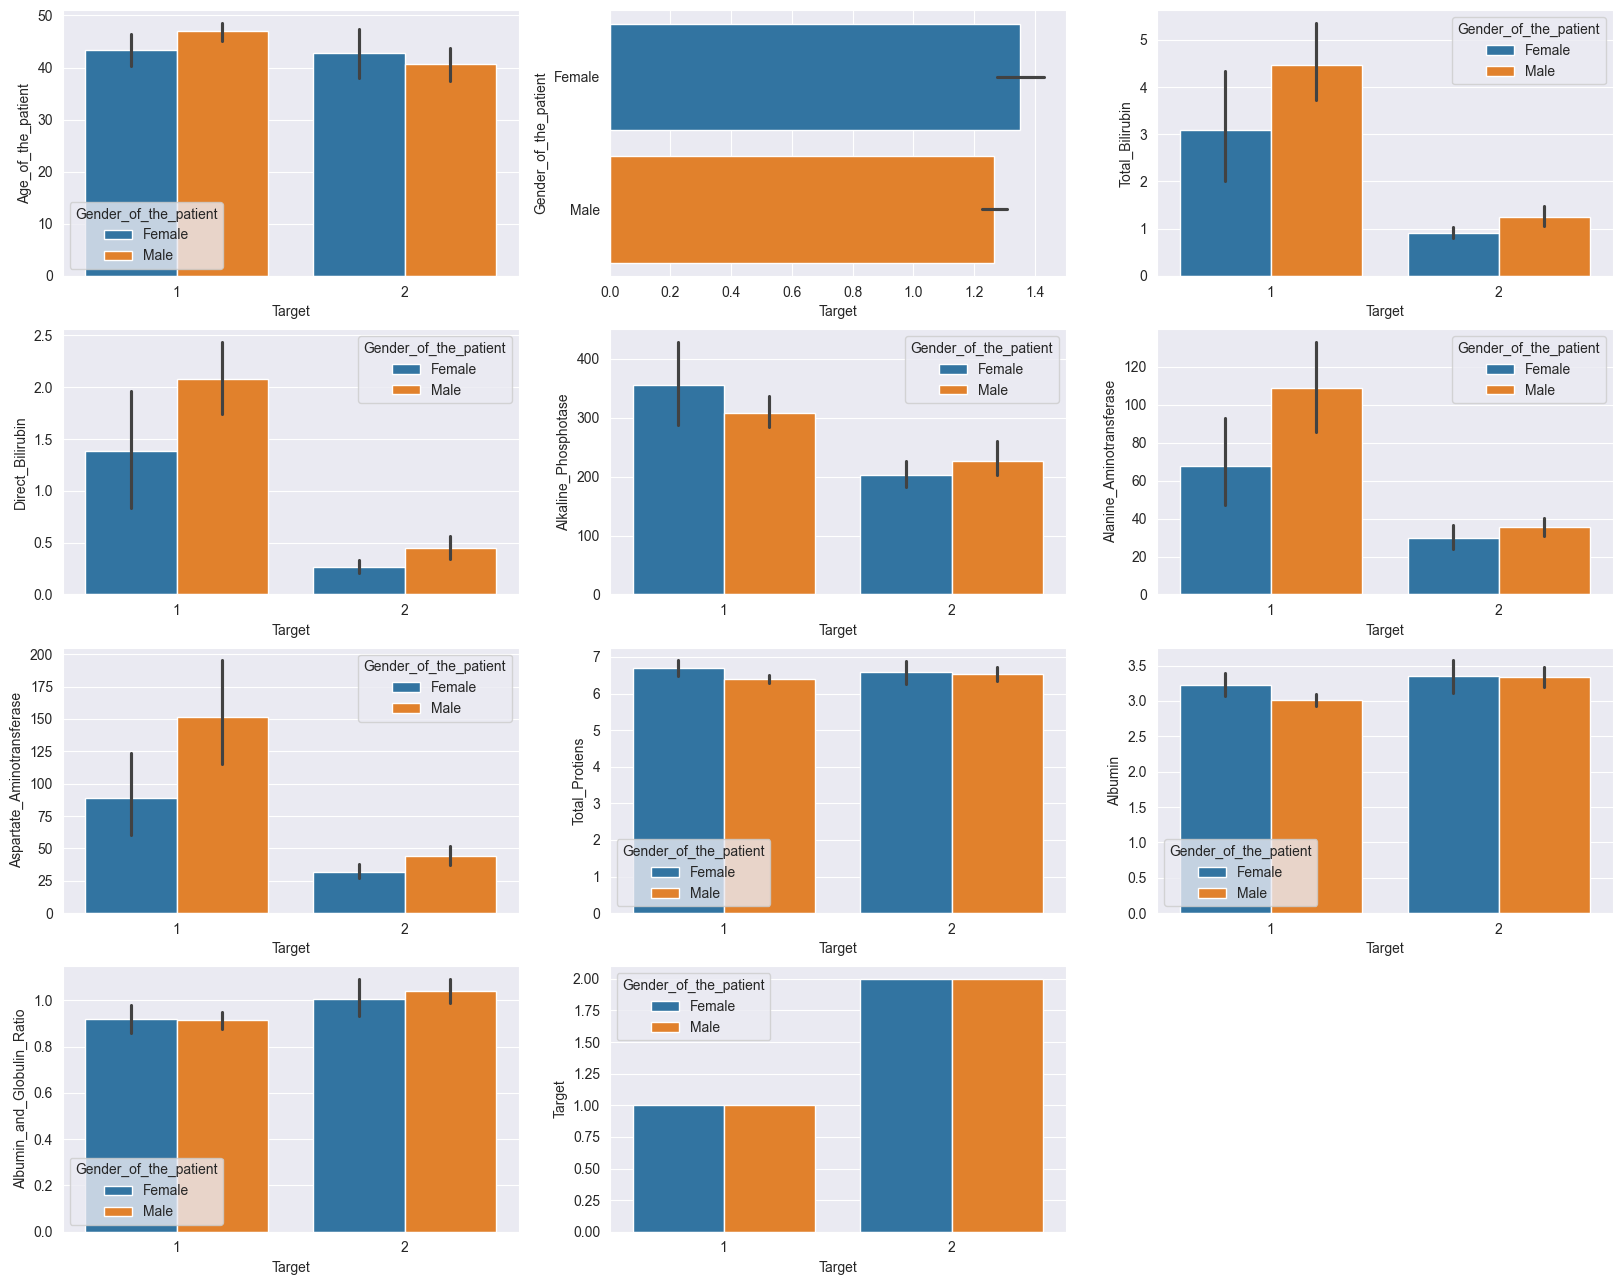

In [40]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in data:
    plt.subplot(5,3,plotnumber)
    sns.barplot(x='Target',y=data[i],data=data,hue='Gender_of_the_patient')
    plotnumber = plotnumber +1
    ### 1 =  liver disease
    ### 2 = no liver disease

### Observation:-

* The male patients are mostly affected than females.
* when the total bilirubin level in males exceeds 1.5, then they are affected.
* In females, when the alkaline phosphotase level is higher than 200 then it causes liver disease.
* When alanine aminotransferase level increases from 40, then it causes liver disease
* When aspartate aminotransferase level in males increases from 50, then it causes liver disease.
* The range of Albumin,albumin and globulin ratio, total protein in both male and female and also in both healthy and affected individual are almost same.

# Heatmap:-

In [42]:
#checking corelation amongs features
plt.figure(figsize=(15,9))
sns.heatmap(data.drop('Target',axis=1).corr(),annot=True)
plt.show()

ValueError: could not convert string to float: 'Female'

<Figure size 1500x900 with 0 Axes>

### Observation:-

- The correlation between Direct_Bilirubin and Total_Bilirubin is high
- Alamine_Aminotransferase and Aspartate_Aminotransferase is high
- Total_Protiens and Albumin is high
- Albumin and Albumin_and_Globulin_Ratio is high

# Scatterplot:-

* A scatterplot is a type of graph that shows the relationship between two numerical variables.

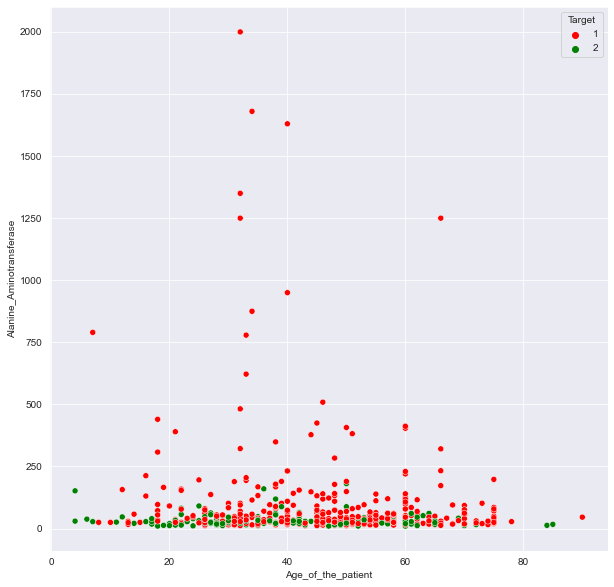

In [ ]:
sns.scatterplot('Age_of_the_patient','Alanine_Aminotransferase', data=data,hue='Target',palette=['r', 'g'])
plt.show()

### Observation:-

* When the age of the patients is between 0 to 25 years, majority of the patients are healthy.
* When the age of the patients is between 40 to 60 years, majority of the patients are affected.


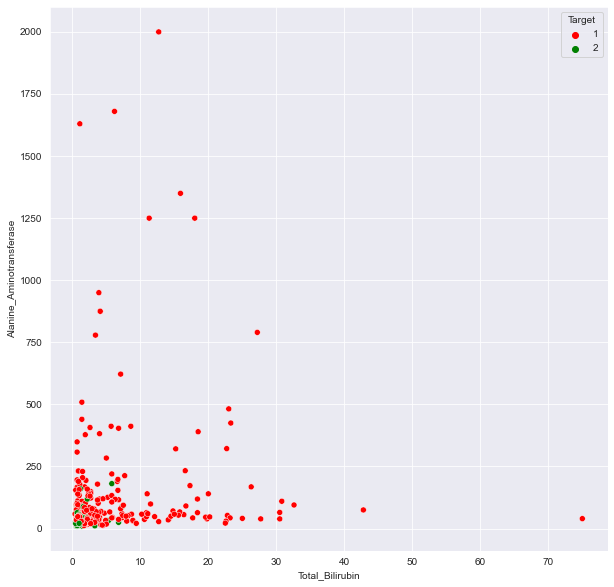

In [ ]:
sns.scatterplot('Total_Bilirubin','Alanine_Aminotransferase', data=data,hue='Target',palette=['r', 'g'])
plt.show()

### Observation:-

* When the total bilirubin exceeds 10 then the patients are surely affected by liver disease
* When the alanine aminotransferase level exceeds 250, then the patients are surely affected.


# Lineplot:-
* It depict the relationship between continuous as well as categorical values in a continuous data point format.

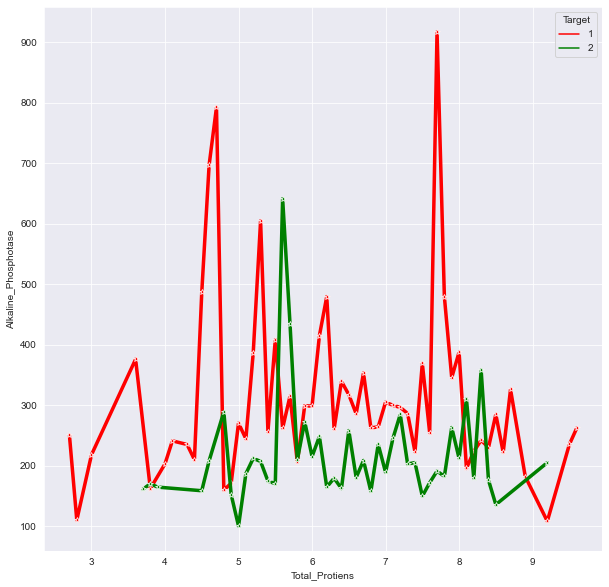

In [ ]:
sns.lineplot(x='Total_Protiens', y='Alkaline_Phosphotase', data=data,hue='Target', ci=None,marker="*",palette=['r', 'g'],linewidth=3.5)  # hue is for categorical data
plt.show()


### Observation:-

* The maximum Alkaline phosphotase level in affected individual is 900
* The maximum total protein level in affected individual is above 9
* When the total protein is between 3.5 to 9.5 the patients are not affected by liver disease
* When the Alkaline phosphotase level is above 100 to nearly 650, then the patients are not affected.


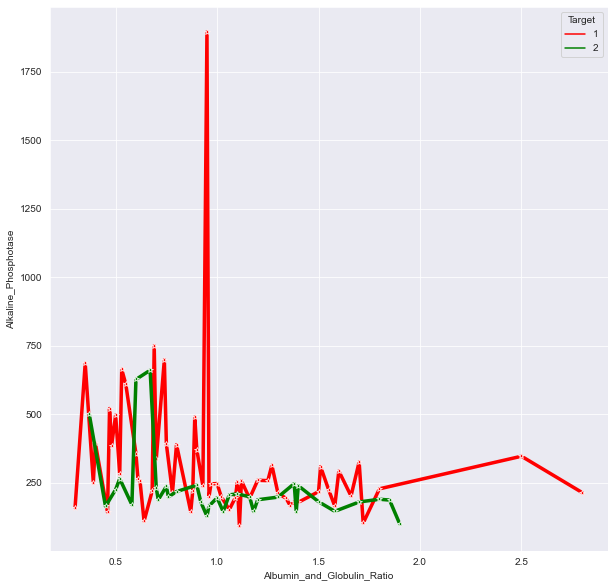

In [ ]:
sns.lineplot(x='Albumin_and_Globulin_Ratio', y='Alkaline_Phosphotase', data=data,hue='Target', ci=None,marker="*",palette=['r', 'g'],linewidth=3.5)  # hue is for categorical data
plt.show()



### Observation:-

* When the albumin and globulin ratio exceeds 2.0, then the patients are surely affected
* When the Alkaline phosphotase level exceeds 650, then the patients are surely affected
* when the albumin and globulin ratio is between 0.5 to 1.8, patients are affected as well as not affected.
* When the alkaline phosphotase level is between 100 to 650, then patients are affected as well as not affected

# FacetGrid:-
  
* It forms a matrix of panels defined by row and column faceting variables
* It is most useful when you have two discrete variables, and all combinations of the variables exist in the data.


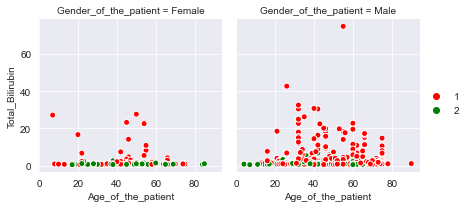

In [ ]:
g = sns.FacetGrid(data, col="Gender_of_the_patient")
g.map_dataframe(sns.scatterplot, x="Age_of_the_patient", y="Total_Bilirubin", hue="Target",palette=['r', 'g'],linewidth=1)
g.add_legend()

### Observation:-

* The male patients are mostly affected and the range is between 0 to 20.
* Comparatively the female patients are less affected.

# Stripplot:- 

* A strip plot is a single-axis scatter plot that is used to visualise the distribution of many individual in one-dimensional values

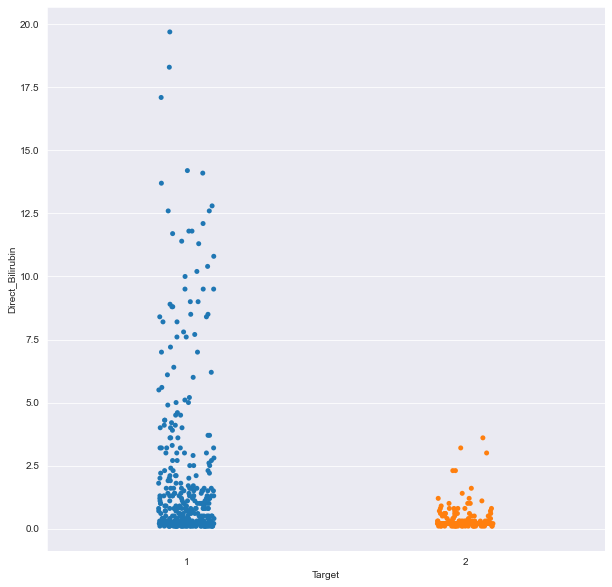

In [ ]:
sns.stripplot(x='Target', y='Direct_Bilirubin', data=data)
plt.show()


### Observation:-

* When the total bilirubin level exceeds from 4.5, then the patient is affected.


# Data Preprocessing:-


In [ ]:
data.isnull().sum()

Age_of_the_patient            0
Gender_of_the_patient         0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alanine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64

- ### Checking for outliers -

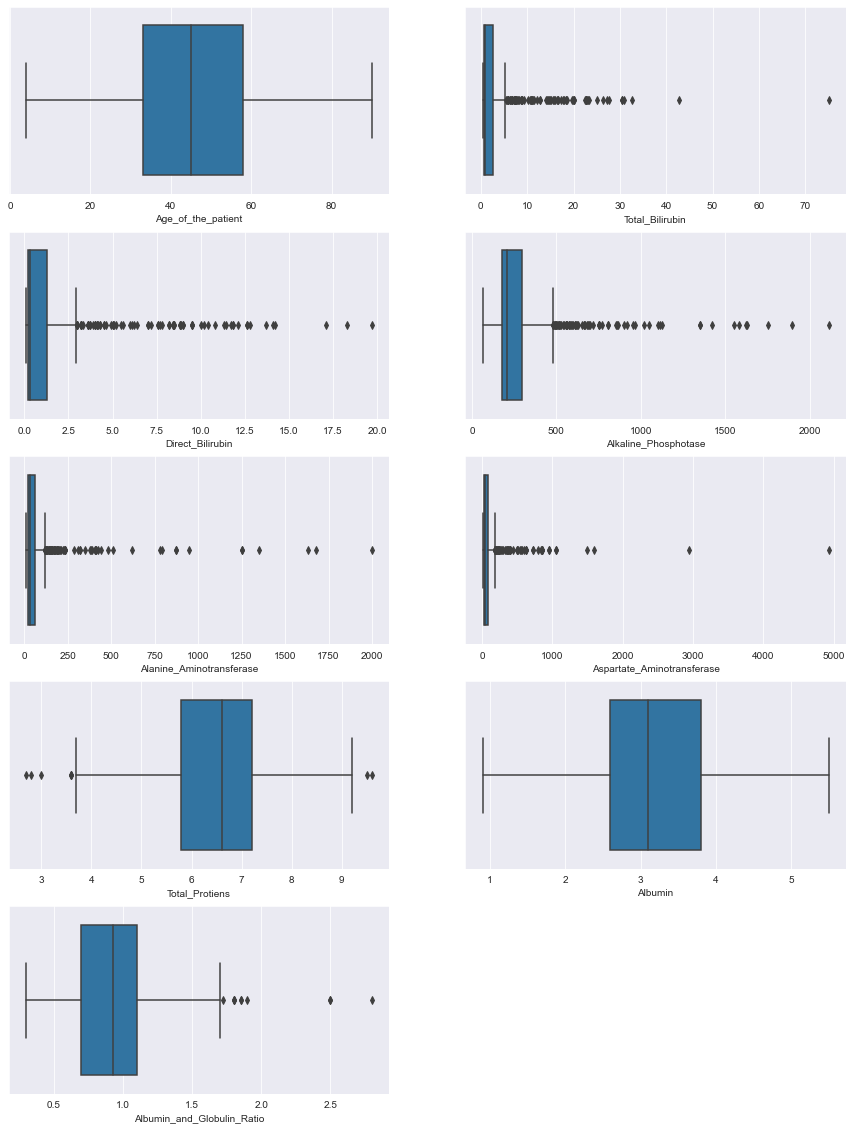

In [ ]:
#droping chategorical feature to plot box plot
data3=data.drop(['Gender_of_the_patient','Target'],axis=1)


#checking for outliers
plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1
for c in data3:
    ax=plt.subplot(5,2,plotnumber)
    sns.boxplot(data3[c])
    plotnumber=plotnumber + 1 
plt.show()

### Observation:-
- In this dataset almost all the features has outliers, so the outliers are not handled.

### Handeling missing values:-
- In Albumin_and_Globulin_Ratio, there are missing values so the missing values are handled using median since it has skewed distribution.

In [ ]:
np.median(data.Albumin_and_Globulin_Ratio.dropna(axis=0))

0.93

In [ ]:
data.loc[data['Albumin_and_Globulin_Ratio'].isnull()==True,'Albumin_and_Globulin_Ratio']= np.median(data.Albumin_and_Globulin_Ratio.dropna(axis=0))


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age_of_the_patient          583 non-null    int64  
 1   Gender_of_the_patient       583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alanine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [ ]:
data

,Age_of_the_patient,Gender_of_the_patient,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


- ### Handeling dupicate values:-

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:

print(data.loc[data.duplicated()].shape) 

(0, 11)


- ### Feature scaling using MinMaxScaler:-

In [ ]:

from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data[['Age_of_the_patient','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alanine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']]=scale.fit_transform(data[['Age_of_the_patient','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alanine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']])




In [ ]:
data

,Age_of_the_patient,Gender_of_the_patient,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,0.709302,Female,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240,1
1,0.674419,Male,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176,1
2,0.674419,Male,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236,1
3,0.627907,Male,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280,1
4,0.790698,Male,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040,1
...,...,...,...,...,...,...,...,...,...,...,...
578,0.651163,Male,0.001340,0.000000,0.213483,0.005025,0.004879,0.463768,0.152174,0.028,2
579,0.418605,Male,0.002681,0.000000,0.017098,0.012563,0.004269,0.478261,0.500000,0.320,1
580,0.558140,Male,0.005362,0.005102,0.088911,0.019095,0.007928,0.536232,0.500000,0.280,1
581,0.313953,Male,0.012064,0.020408,0.059111,0.009548,0.004472,0.594203,0.543478,0.280,1


- ### Categorical encoding :-

In [ ]:
data.Gender_of_the_patient=pd.get_dummies(data.Gender_of_the_patient,drop_first=True)

In [ ]:
data

,Age_of_the_patient,Gender_of_the_patient,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,0.709302,0,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240,1
1,0.674419,1,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176,1
2,0.674419,1,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236,1
3,0.627907,1,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280,1
4,0.790698,1,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040,1
...,...,...,...,...,...,...,...,...,...,...,...
578,0.651163,1,0.001340,0.000000,0.213483,0.005025,0.004879,0.463768,0.152174,0.028,2
579,0.418605,1,0.002681,0.000000,0.017098,0.012563,0.004269,0.478261,0.500000,0.320,1
580,0.558140,1,0.005362,0.005102,0.088911,0.019095,0.007928,0.536232,0.500000,0.280,1
581,0.313953,1,0.012064,0.020408,0.059111,0.009548,0.004472,0.594203,0.543478,0.280,1


- ## Spliting the model into dependent and independent variables

In [ ]:
X=data.iloc[0:,:-1]   # except the last feature all are taken
y=data.Target

In [ ]:
X

,Age_of_the_patient,Gender_of_the_patient,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.709302,0,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240
1,0.674419,1,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176
2,0.674419,1,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236
3,0.627907,1,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280
4,0.790698,1,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040
...,...,...,...,...,...,...,...,...,...,...
578,0.651163,1,0.001340,0.000000,0.213483,0.005025,0.004879,0.463768,0.152174,0.028
579,0.418605,1,0.002681,0.000000,0.017098,0.012563,0.004269,0.478261,0.500000,0.320
580,0.558140,1,0.005362,0.005102,0.088911,0.019095,0.007928,0.536232,0.500000,0.280
581,0.313953,1,0.012064,0.020408,0.059111,0.009548,0.004472,0.594203,0.543478,0.280


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Target, Length: 570, dtype: int64

- ### Spliting the dataset into train_test_split:-

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,random_state=42,test_size=0.25)

NameError: name 'X' is not defined

- ### Balancing the training dataset

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
X_smote, y_smote = smote.fit_resample(X_train,y_train)

NameError: name 'X_train' is not defined

<AxesSubplot:title={'center':'Class distribution after appying SMOTE'}, xlabel='Outcome'>

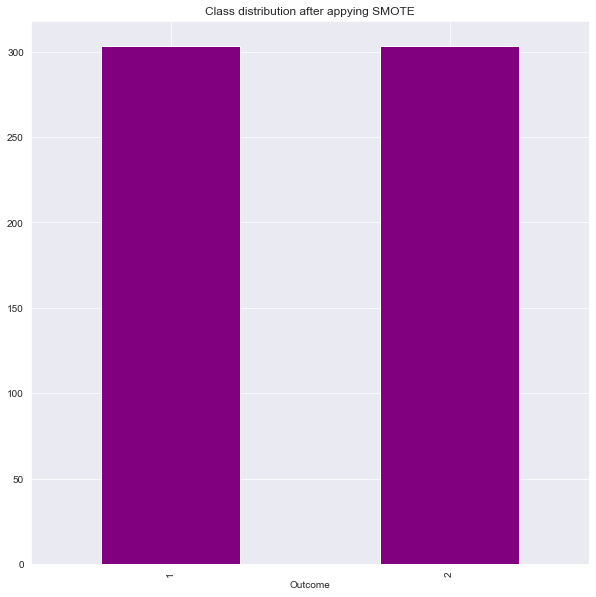

In [ ]:
pd.Series(y_smote).value_counts().plot(kind='bar',color='purple',title='Class distribution after appying SMOTE', xlabel='Outcome')


# Model Creation:-

- ## Logistic Regression:-

In [ ]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [ ]:
clf.fit(X_smote,y_smote) 

LogisticRegression()

In [ ]:
y_pred = clf.predict(X_test) #test
y_pred_train = clf.predict(X_smote) #training

- #### Evaluating logistic regression

In [ ]:
print(f1_score(y_test,y_pred)) #testing
print(f1_score(y_smote,y_pred_train)) #training

0.7386363636363636
0.6931818181818181


In [ ]:
print(accuracy_score(y_test,y_pred)) #testing
print(accuracy_score(y_smote,y_pred_train)) #training

0.6783216783216783
0.7326732673267327


In [ ]:
print(precision_score(y_test,y_pred)) #testing
print(precision_score(y_smote,y_pred_train)) #training

0.8904109589041096
0.8133333333333334


In [ ]:
print(recall_score(y_test,y_pred)) #testing
print(recall_score(y_smote,y_pred_train)) #training

0.6310679611650486
0.6039603960396039


In [ ]:
#Creating objects of Preetytable
x=PrettyTable()
y=PrettyTable()

In [ ]:
x.field_names = ["Model(Test)", "f1_score","accuracy","precision","recall"]
x.add_row(["Logistic Regression", "0.73",'0.67','0.89','0.63'])



In [ ]:
y.field_names = ["Model(Train)", "f1_score","accuracy","precision","recall"]
y.add_row(["Logistic Regression", "0.69",'0.73','0.81','0.60'])



In [ ]:
print(x)
print(y)

+---------------------+----------+----------+-----------+--------+
|     Model(Test)     | f1_score | accuracy | precision | recall |
+---------------------+----------+----------+-----------+--------+
| Logistic Regression |   0.73   |   0.67   |    0.89   |  0.63  |
+---------------------+----------+----------+-----------+--------+
+---------------------+----------+----------+-----------+--------+
|     Model(Train)    | f1_score | accuracy | precision | recall |
+---------------------+----------+----------+-----------+--------+
| Logistic Regression |   0.69   |   0.73   |    0.81   |  0.60  |
+---------------------+----------+----------+-----------+--------+


* ### observation:-
*  We got an recall score of 63% on Test data and 60% on Training Data

- ## Support Vector Machine - Classifier


In [ ]:
from sklearn.svm import SVC
svclassifier = SVC() 

In [ ]:
svclassifier.fit(X_smote, y_smote) # Training the model

SVC()

In [ ]:
X_pred1 = svclassifier.predict(X_test) #Prediction for test data
X_pred_train1= svclassifier.predict(X_smote) #prediction for training data

- #### Evaluating Support Vector Machine- Classifier

In [ ]:
print(f1_score(y_test,X_pred1))
print(f1_score(y_smote,X_pred_train1))

0.6787878787878788
0.6639175257731958


In [ ]:
print(accuracy_score(y_test,X_pred1))
print(accuracy_score(y_smote,X_pred_train1))

0.6293706293706294
0.731023102310231


In [ ]:
print(precision_score(y_test,X_pred1))
print(precision_score(y_smote,X_pred_train1))

0.9032258064516129
0.8846153846153846


In [ ]:
print(recall_score(y_test,X_pred1))
print(recall_score(y_smote,X_pred_train1))

0.5436893203883495
0.5313531353135313


In [ ]:
#Creating objects of Preetytable
x=PrettyTable()
y=PrettyTable()

In [ ]:
x.field_names = ["Model(Test)", "f1_score","accuracy","precision","recall"]
x.add_row(["Support Vector Machine- Classifier", "0.67",'0.62','0.90','0.54'])


In [ ]:
y.field_names = ["Model(Train)", "f1_score","accuracy","precision","recall"]
y.add_row(["Support Vector Machine- Classifier", "0.66",'0.73','0.88','0.53'])


In [ ]:
print(x)
print(y)

+------------------------------------+----------+----------+-----------+--------+
|            Model(Test)             | f1_score | accuracy | precision | recall |
+------------------------------------+----------+----------+-----------+--------+
| Support Vector Machine- Classifier |   0.67   |   0.62   |    0.90   |  0.54  |
+------------------------------------+----------+----------+-----------+--------+
+------------------------------------+----------+----------+-----------+--------+
|            Model(Train)            | f1_score | accuracy | precision | recall |
+------------------------------------+----------+----------+-----------+--------+
| Support Vector Machine- Classifier |   0.66   |   0.73   |    0.88   |  0.53  |
+------------------------------------+----------+----------+-----------+--------+


- ## Observation:-
*  We have high variance and low bias i.e (Overfitting), so we will go for hyperparameter tuning.


- ## Hyperparameter tuning- Support Vector Machine( Classifier)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svclassifier,X_smote,y_smote,cv=3,scoring='f1') ## instead of svclassifier we can also give models like linear regression an dlogistic regression
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())




[0.55844156 0.65030675 0.6993865 ]
Cross validation Score: 0.6360449366584335
Std : 0.05841757047859656


In [ ]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 

grid = GridSearchCV(SVC(random_state=42), param_grid, verbose =3,scoring='f1',cv=5)
  
# fitting the model for grid search
grid.fit(X_smote, y_smote)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.531 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.610 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.647 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.640 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.643 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.593 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.123 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.032 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.663 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.651 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.589 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='f1', verbose=3)

In [ ]:
print(grid.best_params_)

print(grid.best_estimator_)

{'C': 1000, 'gamma': 1}
SVC(C=1000, gamma=1, random_state=42)


In [ ]:
clf2=SVC(C=1000, gamma=1, random_state=42) 

In [ ]:
clf2.fit(X_smote, y_smote)

SVC(C=1000, gamma=1, random_state=42)

In [ ]:
X_pred12 = clf2.predict(X_test)#testing
X_pred_train12 =clf2.predict(X_smote)


In [ ]:
print(f1_score(y_test,X_pred12))
print(f1_score(y_smote,X_pred_train12))

0.7613636363636364
0.7915869980879542


In [ ]:
print(accuracy_score(y_test,X_pred12))
print(accuracy_score(y_smote,X_pred_train12))

0.7062937062937062
0.8201320132013201


In [ ]:
print(precision_score(y_test,X_pred12))
print(precision_score(y_smote,X_pred_train12))

0.9178082191780822
0.9409090909090909


In [ ]:
print(recall_score(y_test,X_pred12))
print(recall_score(y_smote,X_pred_train12))

0.6504854368932039
0.6831683168316832


In [ ]:
#Creating objects of Preetytable
x=PrettyTable()
y=PrettyTable()

In [ ]:
x.field_names = ["Model(Test)", "f1_score","accuracy","precision","recall"]
x.add_row(["Support Vector Machine- Classifier", "0.67",'0.62','0.90','0.54'])
x.add_row(["Support Vector Machine- Classifier(Tuned)", "0.76",'0.70','0.91','0.65'])

In [ ]:
y.field_names = ["Model(Train)", "f1_score","accuracy","precision","recall"]
y.add_row(["Support Vector Machine- Classifier", "0.66",'0.73','0.88','0.53'])
y.add_row(["Support Vector Machine- Classifier(Tuned)", "0.79",'0.82','0.94','0.68'])

In [ ]:
print(x)
print(y)

+-------------------------------------------+----------+----------+-----------+--------+
|                Model(Test)                | f1_score | accuracy | precision | recall |
+-------------------------------------------+----------+----------+-----------+--------+
|     Support Vector Machine- Classifier    |   0.67   |   0.62   |    0.90   |  0.54  |
| Support Vector Machine- Classifier(Tuned) |   0.76   |   0.70   |    0.91   |  0.65  |
+-------------------------------------------+----------+----------+-----------+--------+
+-------------------------------------------+----------+----------+-----------+--------+
|                Model(Train)               | f1_score | accuracy | precision | recall |
+-------------------------------------------+----------+----------+-----------+--------+
|     Support Vector Machine- Classifier    |   0.66   |   0.73   |    0.88   |  0.53  |
| Support Vector Machine- Classifier(Tuned) |   0.79   |   0.82   |    0.94   |  0.68  |
+--------------------

- ## Observation:-
- After performing hyperparameter tuning the scores have improved.

- ## K- Nearest Neighbour


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
error_rate = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_smote,y_smote)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test)) 


Text(0, 0.5, 'Error Rate')

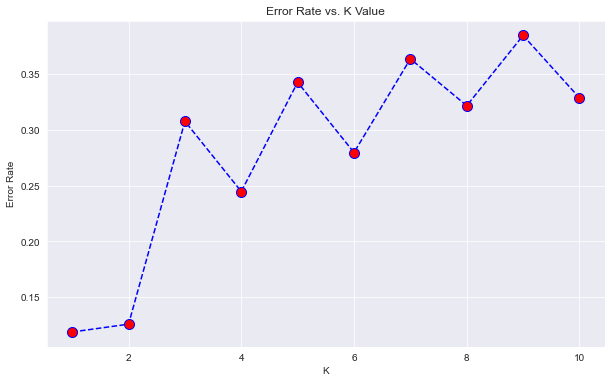

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_smote, y_smote) # Training the model

KNeighborsClassifier(n_neighbors=10)

In [ ]:
X_pred = knn.predict(X_test) #testing
X_pred_train = knn.predict(X_smote) #training

- #### Evaluating K- Nearest Neighbour

In [ ]:
print(f1_score(y_test,X_pred))
print(f1_score(y_smote,X_pred_train))

0.7403314917127072
0.7518796992481203


In [ ]:
print(accuracy_score(y_test,X_pred))
print(accuracy_score(y_smote,X_pred_train))

0.6713286713286714
0.7821782178217822


In [ ]:
print(recall_score(y_test,X_pred))
print(recall_score(y_smote,X_pred_train))

0.6504854368932039
0.6600660066006601


In [ ]:
print(precision_score(y_test,X_pred))
print(precision_score(y_smote,X_pred_train))

0.8589743589743589
0.8733624454148472


In [ ]:
#Creating objects of Preetytable
x=PrettyTable()
y=PrettyTable()

In [ ]:
x.field_names = ["Model(Test)", "f1_score","accuracy","precision","recall"]
x.add_row(["K- Nearest Neighbour", "0.74",'0.67','0.65','0.85'])


In [ ]:
y.field_names = ["Model(Train)", "f1_score","accuracy","precision","recall"]
y.add_row(["K- Nearest Neighbour", "0.75",'0.78','0.66','0.87'])


In [ ]:
print(x)
print(y)

+----------------------+----------+----------+-----------+--------+
|     Model(Test)      | f1_score | accuracy | precision | recall |
+----------------------+----------+----------+-----------+--------+
| K- Nearest Neighbour |   0.74   |   0.67   |    0.65   |  0.85  |
+----------------------+----------+----------+-----------+--------+
+----------------------+----------+----------+-----------+--------+
|     Model(Train)     | f1_score | accuracy | precision | recall |
+----------------------+----------+----------+-----------+--------+
| K- Nearest Neighbour |   0.75   |   0.78   |    0.66   |  0.87  |
+----------------------+----------+----------+-----------+--------+


- ## Observation:-
   - For the values of K above 10 there is no huge variation in scores. 
   - We can say that k=10 will give us the best result in this case.
   

- ## Decision Tree:-


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtr=DecisionTreeClassifier(random_state=42)

In [ ]:
dtr.fit(X_smote,y_smote)

DecisionTreeClassifier(random_state=42)

In [ ]:
X_pred13 = dtr.predict(X_test)
X_pred_train13 = dtr.predict(X_smote)

- #### Evaluating Decision Tree

In [ ]:

print(f1_score(y_test,X_pred13))
print(f1_score(y_smote,X_pred_train13))

0.9509803921568628
1.0


In [ ]:
print(accuracy_score(y_test,X_pred13))
print(accuracy_score(y_smote,X_pred_train13))

0.9300699300699301
1.0


In [ ]:
print(precision_score(y_test,X_pred13))
print(precision_score(y_smote,X_pred_train13))

0.9603960396039604
1.0


In [ ]:
print(recall_score(y_test,X_pred13))
print(recall_score(y_smote,X_pred_train13))

0.941747572815534
1.0


In [ ]:
#Creating objects of Preetytable
x=PrettyTable()
y=PrettyTable()

In [ ]:
x.field_names = ["Model(Test)", "f1_score","accuracy","precision","recall"]
x.add_row(["Decision tree", "0.95",'0.93','0.96','0.94'])

In [ ]:
y.field_names = ["Model(Train)", "f1_score","accuracy","precision","recall"]
y.add_row(["Decision tree", "1.0",'1.0','1.0','1.0'])

In [ ]:
print(x)
print(y)

+---------------+----------+----------+-----------+--------+
|  Model(Test)  | f1_score | accuracy | precision | recall |
+---------------+----------+----------+-----------+--------+
| Decision tree |   0.95   |   0.93   |    0.96   |  0.94  |
+---------------+----------+----------+-----------+--------+
+---------------+----------+----------+-----------+--------+
|  Model(Train) | f1_score | accuracy | precision | recall |
+---------------+----------+----------+-----------+--------+
| Decision tree |   1.0    |   1.0    |    1.0    |  1.0   |
+---------------+----------+----------+-----------+--------+


- ## Observation:-
- From the scores we can conclude that the model is overfit, so we will perform hyperparameter tuning.

# Hyperparameter tuning:-


In [ ]:
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":(list(range(2, 20))),    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}


In [ ]:
tree_clf = DecisionTreeClassifier(random_state=1000)#object creation for decision tree with random state 3

In [ ]:
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)

In [ ]:
tree_cv.fit(X_smote,y_smote)#training data on gridsearch cv

Fitting 3 folds for each of 25992 candidates, totalling 77976 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1000),
             n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15, 16, 17, 18, 19],
                         'splitter': ('best', 'random')},
             scoring='f1', verbose=1)

In [ ]:
best_params = tree_cv.best_params_#it will give you best parameters 
print(f"Best paramters: {best_params})")#printing  best parameters

Best paramters: {'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'random'})


In [ ]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=18,min_samples_leaf= 1,min_samples_split=4,splitter='random')#passing best parameter to decision tree

In [ ]:
dt1.fit(X_smote,y_smote)#training model with best parameter

DecisionTreeClassifier(criterion='entropy', max_depth=18, min_samples_split=4,
                       splitter='random')

In [ ]:
X_pred14 = dt1.predict(X_test)
X_pred_train14 = dt1.predict(X_smote)

- #### Evaluating Decision Tree(tuned):-

In [ ]:
print(f1_score(y_test,X_pred14))
print(f1_score(y_smote,X_pred_train14))

0.9405940594059405
0.9603960396039604


In [ ]:
print(accuracy_score(y_test,X_pred14))
print(accuracy_score(y_smote,X_pred_train14))

0.916083916083916
0.9603960396039604


In [ ]:
print(precision_score(y_test,X_pred14))
print(precision_score(y_smote,X_pred_train14))

0.9595959595959596
0.9603960396039604


In [ ]:
print(recall_score(y_test,X_pred14))
print(recall_score(y_smote,X_pred_train14))

0.9223300970873787
0.9603960396039604


In [ ]:
#Creating objects of Preetytable
x=PrettyTable()
y=PrettyTable()

In [ ]:
x.field_names = ["Model(Test)", "f1_score","accuracy","precision","recall"]
x.add_row(["Decision tree", "0.95",'0.93','0.96','0.94'])
x.add_row(["Decision tree(tuned)", "0.94",'0.91','0.95','0.92'])

In [ ]:
y.field_names = ["Model(Train)", "f1_score","accuracy","precision","recall"]
y.add_row(["Decision tree", "1.0",'1.0','1.0','1.0'])
y.add_row(["Decision tree(tuned)", "0.96",'0.96','0.96','0.96'])

In [ ]:
print(x)
print(y)

+----------------------+----------+----------+-----------+--------+
|     Model(Test)      | f1_score | accuracy | precision | recall |
+----------------------+----------+----------+-----------+--------+
|    Decision tree     |   0.95   |   0.93   |    0.96   |  0.94  |
| Decision tree(tuned) |   0.94   |   0.91   |    0.95   |  0.92  |
+----------------------+----------+----------+-----------+--------+
+----------------------+----------+----------+-----------+--------+
|     Model(Train)     | f1_score | accuracy | precision | recall |
+----------------------+----------+----------+-----------+--------+
|    Decision tree     |   1.0    |   1.0    |    1.0    |  1.0   |
| Decision tree(tuned) |   0.96   |   0.96   |    0.96   |  0.96  |
+----------------------+----------+----------+-----------+--------+


- ## Observation:-
- Model is performing slightly good after performing hyperparameter tuning.

# Random forest:-


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)

In [ ]:
rf_clf.fit(X_smote,y_smote)

RandomForestClassifier()

In [ ]:
X_pred15 = rf_clf.predict(X_test)
X_pred_train15 = rf_clf.predict(X_smote)


- #### Evaluating Random Forest:-

In [ ]:
print(f1_score(y_test,X_pred15))
print(f1_score(y_smote,X_pred_train15))

0.9463414634146341
1.0


In [ ]:
print(accuracy_score(y_test,X_pred15))
print(accuracy_score(y_smote,X_pred_train15))

0.9230769230769231
1.0


In [ ]:
print(precision_score(y_test,X_pred15))
print(precision_score(y_smote,X_pred_train15))

0.9509803921568627
1.0


In [ ]:
print(recall_score(y_test,X_pred15))
print(recall_score(y_smote,X_pred_train15))

0.941747572815534
1.0


In [ ]:
#Creating objects of Preetytable
x=PrettyTable()
y=PrettyTable()

In [ ]:
x.field_names = ["Model(Test)", "f1_score","accuracy","precision","recall"]
x.add_row(["Random Forest", "0.94",'0.92','0.95','0.94'])


In [ ]:
y.field_names = ["Model(Test)", "f1_score","accuracy","precision","recall"]
y.add_row(["Random Forest", "1.0",'1.0','1.0','1.0'])


In [ ]:
print(x)
print(y)

+---------------+----------+----------+-----------+--------+
|  Model(Test)  | f1_score | accuracy | precision | recall |
+---------------+----------+----------+-----------+--------+
| Random Forest |   0.94   |   0.92   |    0.95   |  0.94  |
+---------------+----------+----------+-----------+--------+
+---------------+----------+----------+-----------+--------+
|  Model(Test)  | f1_score | accuracy | precision | recall |
+---------------+----------+----------+-----------+--------+
| Random Forest |   1.0    |   1.0    |    1.0    |  1.0   |
+---------------+----------+----------+-----------+--------+


- ## Observation:-
- From the scores we can conclude that the model is overfit, so we will perform hyperparameter tuning.

- ## Hyperparameter tuning( Random Forest):-


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]       #Number of decision trees
max_features = ['log2', 'sqrt']                                  #maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]      #List Comprehension-using for loop in list
min_samples_split = (list(range(2, 20)))#minimum number of samples required to split an internal node
min_samples_leaf = (list(range(2, 20)))#minimum number of samples required to be at a leaf node.

 


In [ ]:
#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
#MODEL Creation
rf_clf1 = RandomForestClassifier(random_state=42)#model

In [ ]:
rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

In [ ]:
rf_cv.fit(X_smote, y_smote) #training the model

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10, 11, 12,
                                                             13, 14, 15, 16, 17,
                                                             18, 19],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11, 12,
                                                              13, 14, 15, 16,
                                                              17, 18, 19],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='f1', verbose=2)

In [ ]:
rf_best_params = rf_cv.best_params_                          ##it will give you best parameters 
print(f"Best paramters: {rf_best_params})") 

Best paramters: {'n_estimators': 1600, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 40})


In [ ]:
#passing best parameter to randomforest
rf_clf2 = RandomForestClassifier(n_estimators= 1600, min_samples_split= 3, min_samples_leaf= 2, 
                                 max_features= 'log2', max_depth= 40)

In [ ]:
rf_clf2.fit(X_smote,y_smote)

RandomForestClassifier(max_depth=40, max_features='log2', min_samples_leaf=2,
                       min_samples_split=3, n_estimators=1600)

In [ ]:
X_pred16 = rf_clf2.predict(X_test)
X_pred_train16 = rf_clf2.predict(X_smote)

In [ ]:
print(f1_score(y_test,X_pred16))
print(f1_score(y_smote,X_pred_train16))

0.9509803921568628
0.9983525535420099


In [ ]:
print(accuracy_score(y_test,X_pred16))
print(accuracy_score(y_smote,X_pred_train16))

0.9300699300699301
0.9983498349834984


In [ ]:
print(precision_score(y_test,X_pred16))
print(precision_score(y_smote,X_pred_train16))

0.9603960396039604
0.9967105263157895


In [ ]:
print(recall_score(y_test,X_pred16))
print(recall_score(y_smote,X_pred_train16))

0.941747572815534
1.0


In [ ]:
#Creating objects of Preetytable
x=PrettyTable()
y=PrettyTable()

In [ ]:
x.field_names = ["Model(Test)", "f1_score","accuracy","precision","recall"]
x.add_row(["Random Forest", "0.94",'0.92','0.95','0.94'])
x.add_row(["Random Forest(tuned)", "0.95",'0.93','0.96','0.94'])

In [ ]:
y.field_names = ["Model(Train)", "f1_score","accuracy","precision","recall"]
y.add_row(["Random Forest", "1.0",'1.0','1.0','1.0'])
y.add_row(["Random Forest(tuned)", "0.99",'0.99','0.99','1.0'])

In [ ]:
print(x)
print(y)

+----------------------+----------+----------+-----------+--------+
|     Model(Test)      | f1_score | accuracy | precision | recall |
+----------------------+----------+----------+-----------+--------+
|    Random Forest     |   0.94   |   0.92   |    0.95   |  0.94  |
| Random Forest(tuned) |   0.95   |   0.93   |    0.96   |  0.94  |
+----------------------+----------+----------+-----------+--------+
+----------------------+----------+----------+-----------+--------+
|     Model(Train)     | f1_score | accuracy | precision | recall |
+----------------------+----------+----------+-----------+--------+
|    Random Forest     |   1.0    |   1.0    |    1.0    |  1.0   |
| Random Forest(tuned) |   0.99   |   0.99   |    0.99   |  1.0   |
+----------------------+----------+----------+-----------+--------+


- ## Observation:-
- Model is performing slightly good after performing hyperparameter tuning, but still overfitting.

# Conclusion-

- Five machine learning models i.e logistic regression, support vector machine(classifier), K- Nearest Neighbour, Decission tree and Random forest were examined in this case study to predict the liver disease in patient at the business segment level
- Training and testing data were used to train and test the data. These records were used to extract a number of characteristics.My suggested model can estimate the liver disease in patients.
- To the highest possible standard, much prior studies in liver disease prediction using the large dataset depended on standard statistical approaches, which have their own limitations in terms of underlying issue estimates and hypotheses.
- To our knowledge, no other research have included statistics from Fatty liver disease, Hepatitis C virus infection, Drug‐induced liver injury, genetic testing which plays a important role in liver disease prediction.
- Neither of the databases have provided precise information regarding the genetics of liver patients,food habits of the patients, medications used by the patients. This framework maybe expanded in the future to also include the genetics of the disease in details.
- By merging such data, it is feasible to create a more robust model to predict the liver patient in real time. We will also examine specific technological Models, such as Deeper Learning methods, meanwhile striving to enhance existing models by modifying their hyper-parameters to get the optimum design for liver disease prediction in patients.
- The two models that are performing comparatively good in the given dataset are K- Nearest Neighbour and Decission tree(tuned).

# Challenges faced:-

- Understanding the data
- Exploring the abbreviation used in fifa
- Dealing with special charecters and Data Cleaning
- Understanding PCA and working with the optimum no of folds
-


- With the given features, we have compared, examined, analyzed and have conducted a proper case study to cluster the players into groups depending upon certain criterias 
- Outlier handling plays a significant role in the outcome of silhoute scores as handling particular features which have extreme values in them, have a impact on getting good score.
- All the task which have been asked to performed have been represented in a proper manner to get a idea about the clustering of players.
- Missing values have huge influence in the dataset as most of the features had missing values in it, we have examined and imputed it accordingly.
- PCA is used in this dataset
- K- Means have been used in model creation, and the silhoute score which the model is giving is 63